In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn import metrics
import datetime as dt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

import seaborn as sns

# Member data

Gender column in membership data has a couple of NA's, in fact 65%, so not so much to use for this particular column. The data is distributed over 21 cities.

Total count: 6.8 M members (6769473, and all indeed unique, no duplicate msno's)
- Age [bd]: wildely distributed including negative values (plenty of them), thus have to find out later how useful it would be.
- Gender: as already listed before 65 % unkown, most probably not useful.
- City: distributed among 21 cities, most of the users live in city "1", over 5 M (most probably Taipeh)
- 18 different methods to register, out of those 4 are more wildly used (methods 3,4,7,9), the others are rather negligible.
- users registered starting from March 26, 2004 to April 29, 2017.

In [2]:
df_mem=pd.read_csv("data/members_v3.csv")
df_mem

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915
...,...,...,...,...,...,...
6769468,VSGkb3hyBRUtb/b1MQUZbvOkktS3vKLnhMHW0CF8eyU=,1,0,NaN,7,20151020
6769469,nWjH7glPkZ7jOVaCRwwjlpmp0T1hSWdv8hMJxiWCwKc=,1,0,NaN,7,20151020
6769470,GH+b5+1tlv7ZZXsA8upBzVXMTLyffKcsF7WoU8b5rOI=,15,26,female,4,20151020
6769471,XVlwT3fdCFGKqerEKBzUIjK+jzI6jzSke4cDMVhYyjE=,1,0,NaN,4,20151020


In [3]:
df_mem["registration_init_time_as_dt"]=pd.to_datetime(df_mem["registration_init_time"], format='%Y%m%d', errors='ignore')

Monthly registration numbers show in general an increase up to begin of 2016, then we do observe quite a drop in registration numbers in the dat file but still higher numbers than in 2015

<AxesSubplot:xlabel='registration_init_time_as_dt'>

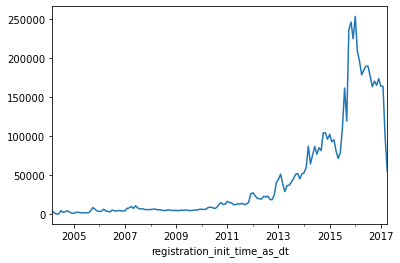

In [4]:
df_mem.groupby(pd.Grouper(key="registration_init_time_as_dt", freq="m")).count()["registration_init_time"].plot()

In [5]:
df_mem

,msno,city,bd,gender,registered_via,registration_init_time,registration_init_time_as_dt
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911,2011-09-11
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914,2011-09-14
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915,2011-09-15
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915,2011-09-15
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915,2011-09-15
...,...,...,...,...,...,...,...
6769468,VSGkb3hyBRUtb/b1MQUZbvOkktS3vKLnhMHW0CF8eyU=,1,0,NaN,7,20151020,2015-10-20
6769469,nWjH7glPkZ7jOVaCRwwjlpmp0T1hSWdv8hMJxiWCwKc=,1,0,NaN,7,20151020,2015-10-20
6769470,GH+b5+1tlv7ZZXsA8upBzVXMTLyffKcsF7WoU8b5rOI=,15,26,female,4,20151020,2015-10-20
6769471,XVlwT3fdCFGKqerEKBzUIjK+jzI6jzSke4cDMVhYyjE=,1,0,NaN,4,20151020,2015-10-20


In [6]:
print(df_mem["registration_init_time"].min(),df_mem["registration_init_time"].max())

20040326 20170429


In [7]:
df_mem.nunique()

msno                            6769473
city                                 21
bd                                  386
gender                                2
registered_via                       18
registration_init_time             4782
registration_init_time_as_dt       4782
dtype: int64

In [8]:
df_mem.isna().sum()/df_mem.isna().count()

msno                            0.000000
city                            0.000000
bd                              0.000000
gender                          0.654335
registered_via                  0.000000
registration_init_time          0.000000
registration_init_time_as_dt    0.000000
dtype: float64

<AxesSubplot:ylabel='Frequency'>

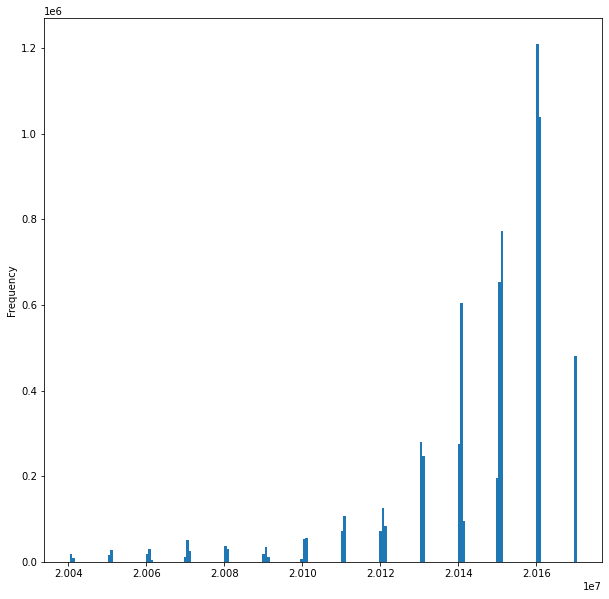

In [9]:
fig, ax = plt.subplots()
df_mem["registration_init_time"].plot(kind="hist",ax=ax,figsize=(10,10),bins=200)

<AxesSubplot:>

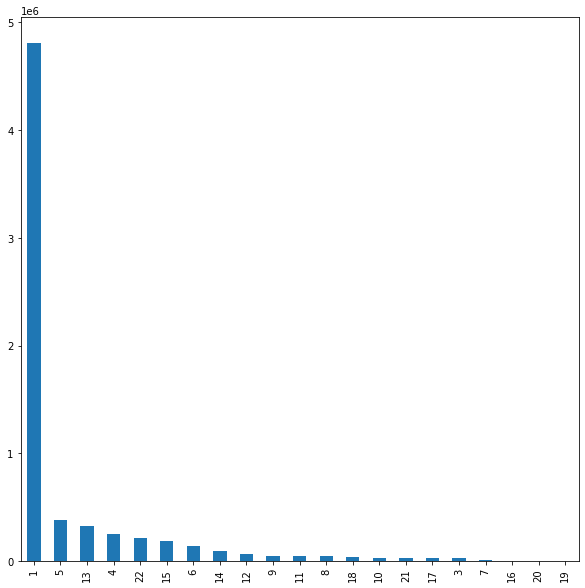

In [10]:
fig, ax = plt.subplots()
df_mem["city"].value_counts().plot(kind="bar",ax=ax,figsize=(10,10))

<AxesSubplot:>

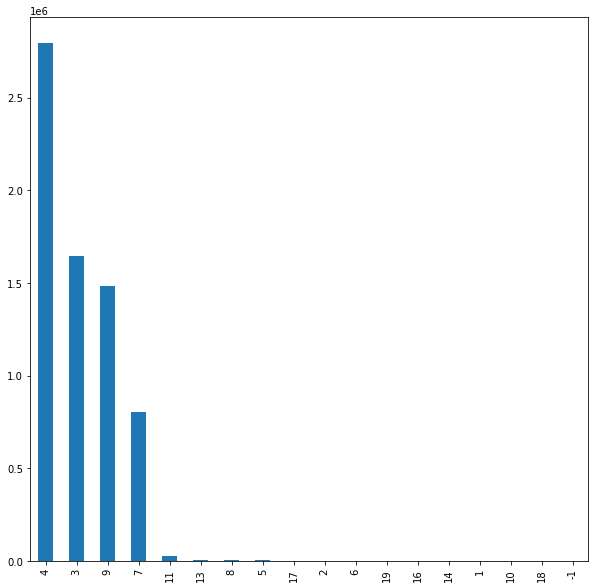

In [11]:
fig, ax = plt.subplots()
df_mem["registered_via"].value_counts().plot(kind="bar",ax=ax,figsize=(10,10))

In [12]:
import time
import psutil
import multiprocessing as mp

#check the number of cores
num_cores = mp.cpu_count()
print("This kernel has ",num_cores,"cores and you can find the information regarding the memory usage:",psutil.virtual_memory())

This kernel has  8 cores and you can find the information regarding the memory usage: svmem(total=17179869184, available=9531867136, percent=44.5, used=4998086656, free=5703200768, active=2425974784, inactive=3779379200, wired=2572111872)


In [13]:
df_ul_check=pd.read_csv("data/user_logs.csv",nrows=100)
#df_ul["date_as_dt"]=pd.to_datetime(df_ul["date"], format='%Y%m%d', errors='ignore')
df_ul_check.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150513,0,0,0,0,1,1,280.335
1,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=,20150709,9,1,0,0,7,11,1658.948
2,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150105,3,3,0,0,68,36,17364.956
3,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150306,1,0,1,1,97,27,24667.317
4,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20150501,3,0,0,0,38,38,9649.029


In [14]:
df_test=df_ul_check.sort_values(by=['date']).groupby(["msno"])[['date']].diff().rename(columns={"date": "delta_date"})
#df_test=df_test.rename(columns={"date": "delta_date"})
df_test.head()

,delta_date
95,NaN
2,NaN
58,NaN
80,NaN
22,NaN


In [15]:
#no duplicates in v2
df_ul=pd.read_csv("data/user_logs.csv",usecols=['msno'])
#df_ul["date_as_dt"]=pd.to_datetime(df_ul["date"], format='%Y%m%d', errors='ignore')
df_ul.head()

,msno
0,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=
1,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=
2,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=
3,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=
4,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=


In [16]:
df_ul_v2=pd.read_csv("data/user_logs_V2.csv",usecols=['msno'])
df_ul_v2

,msno
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=
...,...
18396357,FGpiy2mB+vXLKziYRcY/xJcJEFJfRDfUqlU+p760f7E=
18396358,iZRjKNMrw5ffEbfXODLhV/0tJLPbOH3am1WYDgqBf8Q=
18396359,yztw4Y0EggG0w2wPkbMZx7ke7saSx7dLSfMheHZG/DQ=
18396360,swCHwkNx30/aENjq30qqaLlm7bUUytbMXdz1bH7g0Jk=


In [17]:
df_ul=df_ul.append(df_ul_v2)
df_ul

,msno
0,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=
1,rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=
2,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=
3,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=
4,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=
...,...
18396357,FGpiy2mB+vXLKziYRcY/xJcJEFJfRDfUqlU+p760f7E=
18396358,iZRjKNMrw5ffEbfXODLhV/0tJLPbOH3am1WYDgqBf8Q=
18396359,yztw4Y0EggG0w2wPkbMZx7ke7saSx7dLSfMheHZG/DQ=
18396360,swCHwkNx30/aENjq30qqaLlm7bUUytbMXdz1bH7g0Jk=


In [18]:
msno_list=df_ul['msno'].unique().tolist()
len(msno_list)

5339422

In [31]:
chunk_counter=250000
test_msno_lists= [msno_list[x:x+chunk_counter] for x in range(0, len(msno_list), chunk_counter)]



In [35]:
day_period=30

chunk_size = math.ceil(len(df_ul)/50.)
#print(chunksize)

sum_test=0
df_agg_per_user_list=[]
for ind,m_list in enumerate(test_msno_lists):
    sum_test=0
    print(m_list[0:1])
    small_dfs_list=[]
    size_list=[]
    #if(ind>1):
    #    continue
    print(len(m_list),ind)
    for chunk in pd.read_csv("data/user_logs.csv", chunksize=chunk_size):
        small_df=chunk[chunk['msno'].isin(m_list)]
        if(small_df.size>0):
            print(small_df.shape)
        sum_test=sum_test+len(small_df)
        small_dfs_list.append(small_df)
        size_list.append(len(small_df))
    print("end off first user logs",sum_test)
    for chunk_V2 in pd.read_csv("data/user_logs_V2.csv", chunksize=chunk_size):
        small_df=chunk_V2[chunk_V2['msno'].isin(m_list)]
        if(small_df.size>0):
            print("V2",small_df.shape)
            sum_test=sum_test+len(small_df)
            size_list.append(len(small_df))
        #sum_test=sum_test+len(small_df)
        small_dfs_list.append(small_df)
    large_df = pd.concat(small_dfs_list, ignore_index=True)
    print("len before",sum_test,large_df.shape,min(size_list),max(size_list))
    large_df = large_df.drop_duplicates(ignore_index=True)
    #date	num_25	num_50	num_75	num_985	num_100	num_unq	total_secs
    large_df['date']=pd.to_datetime(large_df['date'], format='%Y%m%d', errors='ignore')
    print("len after",sum_test,large_df.shape)
    delta_data_large_df = large_df.sort_values(by=['date']).groupby(["msno"])[['date']].diff().rename(columns={"date": "delta_date"})
    
    #df_delta_tra=df_tra.sort_values(by=["transaction_date_dt"]).groupby(["msno"])[["actual_amount_paid","transaction_date_dt","membership_expire_date_dt"]].shift()

    #df_delta_tra=df_delta_tra.rename(columns={"actual_amount_paid": "actual_amount_paid_prev", "transaction_date_dt": "transaction_date_dt_prev", "membership_expire_date_dt": "membership_expire_date_dt_prev_prel"})

    large_df=pd.concat([large_df, delta_data_large_df], axis=1, sort=False)
    #print(large_df.sort_values(by=["msno","date"]).head(50))
    
    df_agg_first_last_date = large_df.groupby(["msno"]).agg(first_act_date=('date','min'),
                                                    last_act_date=('date','max')).reset_index()
    large_df=large_df.merge(df_agg_first_last_date, on='msno')
    large_df['activity_duration']=large_df['last_act_date']-large_df['first_act_date']
    large_df['activity_duration']=large_df['activity_duration'].dt.days
    large_df['delta_date']=large_df['delta_date'].dt.days-1
    
    
    #print(large_df.sort_values(by=["msno","date"]).head(50))
    """
    df_agg_temp_deltas_first=large_df[(large_df['delta_date'].notna()) & 
                                    (large_df['date']<(large_df['first_act_date']+dt.timedelta(days=day_period)))
                                   ].groupby(["msno"]).agg(
                                                n_max_break_first=('delta_date','max'),
                                                n_min_break_first=('delta_date','min'),
                                                n_mean_break_first=('delta_date','mean'),
                                                n_mode_break_first=('delta_date',lambda x: pd.Series.mode(x)[0]),
                                                n_median_break_first=('delta_date','median')
                                                ).reset_index()
    """
    df_agg_temp_deltas_last=large_df[(large_df['delta_date'].notna()) & 
                                    (large_df['date']>(large_df['last_act_date']-dt.timedelta(days=day_period)))
                                   ].groupby(["msno"]).agg(
                                                n_max_break_last=('delta_date','max'),
                                                n_min_break_last=('delta_date','min'),
                                                n_mean_break_last=('delta_date','mean'),
                                                n_mode_break_last=('delta_date',lambda x: pd.Series.mode(x)[0]),
                                                n_median_break_last=('delta_date','median')
                                                ).reset_index()

    
    df_agg_temp_deltas=large_df[large_df['delta_date'].notna()].groupby(["msno"]).agg(
                                                n_max_break=('delta_date','max'),
                                                n_min_break=('delta_date','min'),
                                                n_mean_break=('delta_date','mean'),
                                                n_mode_break=('delta_date',lambda x: pd.Series.mode(x)[0]),
                                                n_median_break=('delta_date','median')
                                                ).reset_index()
    
    
    df_agg_temp_last=large_df[(large_df['date']>(large_df['last_act_date']-dt.timedelta(days=day_period)))].groupby(
                                       ["msno"]).agg(
                                                n_active_days_last=('date','nunique'),
                                                sum_num_25_last=('num_25','sum'),
                                                sum_num_50_last=('num_50','sum'),
                                                sum_num_75_last=('num_75','sum'),
                                                sum_num_985_last=('num_985','sum'),
                                                sum_num_100_last=('num_100','sum'),
                                                sum_num_unq_last=('num_unq','sum'),
                                                tot_secs_last=('total_secs','sum'),
                                                mean_num_25_last=('num_25','mean'),
                                                #max_num_25_last=('num_25','max'),
                                                median_num_25_last=('num_25','median'),
                                                q25_num_25_last=('num_25',lambda x: x.quantile(0.25)),
                                                q75_num_25_last=('num_25',lambda x: x.quantile(0.75)),
                                                std_num_25_last=('num_25','std'),
                                                #mean_num_50_last=('num_50','mean'),
                                                #max_num_50_last=('num_50','max'),
                                                median_num_50_last=('num_50','median'),
                                                #q25_num_50_last=('num_50',lambda x: x.quantile(0.25)),
                                                #q75_num_50_last=('num_50',lambda x: x.quantile(0.75)),
                                                std_num_50_last=('num_50','std'),
                                                #mean_num_75_last=('num_75','mean'),
                                                #max_num_75_last=('num_75','max'),
                                                median_num_75_last=('num_75','median'),
                                                #q25_num_75_last=('num_75',lambda x: x.quantile(0.25)),
                                                #q75_num_75_last=('num_75',lambda x: x.quantile(0.75)),
                                                std_num_75_last=('num_75','std'),
                                                #mean_num_985_last=('num_985','mean'),
                                                #max_num_985_last=('num_985','max'),
                                                median_num_985_last=('num_985','median'),
                                                #q25_num_985_last=('num_985',lambda x: x.quantile(0.25)),
                                                #q75_num_985_last=('num_985',lambda x: x.quantile(0.75)),
                                                std_num_985_last=('num_985','std'),
                                                mean_num_100_last=('num_100','mean'),
                                                #max_num_100_last=('num_100','max'),
                                                median_num_100_last=('num_100','median'),
                                                q25_num_100_last=('num_100',lambda x: x.quantile(0.25)),
                                                q75_num_100_last=('num_100',lambda x: x.quantile(0.75)),
                                                std_num_100_last=('num_100','std'),
                                                mean_tot_secs_last=('total_secs','mean'),
                                                #max_tot_secs_last=('total_secs','max'),
                                                median_tot_secs_last=('total_secs','median'),
                                                q25_tot_secs_last=('total_secs',lambda x: x.quantile(0.25)),
                                                q75_tot_secs_last=('total_secs',lambda x: x.quantile(0.75)),
                                                std_tot_secs_last=('total_secs','std')                                        
                                        
    ).reset_index()
    
    
    
    
    
    df_agg_temp=large_df.groupby(["msno"]).agg(activity_duration=('activity_duration','min'),
                                                last_date_active=('date','max'),
                                                n_active_days=('date','nunique'),
                                                sum_num_25=('num_25','sum'),
                                                sum_num_50=('num_50','sum'),
                                                sum_num_75=('num_75','sum'),
                                                sum_num_985=('num_985','sum'),
                                                sum_num_100=('num_100','sum'),
                                                sum_num_unq=('num_unq','sum'),
                                                tot_secs=('total_secs','sum'),
                                                mean_num_25=('num_25','mean'),
                                                #max_num_25=('num_25','max'),
                                                median_num_25=('num_25','median'),
                                                q25_num_25=('num_25',lambda x: x.quantile(0.25)),
                                                q75_num_25=('num_25',lambda x: x.quantile(0.75)),
                                                std_num_25=('num_25','std'),
                                                #mean_num_50=('num_50','mean'),
                                                #max_num_50=('num_50','max'),
                                                median_num_50=('num_50','median'),
                                                #q25_num_50=('num_50',lambda x: x.quantile(0.25)),
                                                #q75_num_50=('num_50',lambda x: x.quantile(0.75)),
                                                std_num_50=('num_50','std'),
                                                #mean_num_75=('num_75','mean'),
                                                #max_num_75=('num_75','max'),
                                                median_num_75=('num_75','median'),
                                                #q25_num_75=('num_75',lambda x: x.quantile(0.25)),
                                                #q75_num_75=('num_75',lambda x: x.quantile(0.75)),
                                                std_num_75=('num_75','std'),
                                                #mean_num_985=('num_985','mean'),
                                                #max_num_985=('num_985','max'),
                                                median_num_985=('num_985','median'),
                                                #q25_num_985=('num_985',lambda x: x.quantile(0.25)),
                                                #q75_num_985=('num_985',lambda x: x.quantile(0.75)),
                                                std_num_985=('num_985','std'),
                                                mean_num_100=('num_100','mean'),
                                                #max_num_100=('num_100','max'),
                                                median_num_100=('num_100','median'),
                                                q25_num_100=('num_100',lambda x: x.quantile(0.25)),
                                                q75_num_100=('num_100',lambda x: x.quantile(0.75)),
                                                std_num_100=('num_100','std'),
                                                mean_tot_secs=('total_secs','mean'),
                                                #max_tot_secs=('total_secs','max'),
                                                median_tot_secs=('total_secs','median'),
                                                q25_tot_secs=('total_secs',lambda x: x.quantile(0.25)),
                                                q75_tot_secs=('total_secs',lambda x: x.quantile(0.75)),
                                                std_tot_secs=('total_secs','std')                                        
                                        
    ).reset_index()
    df_agg_temp=df_agg_temp.merge(df_agg_temp_deltas, how='outer',on='msno'
                                ).merge(df_agg_temp_deltas_last, how='outer',on='msno')
    df_agg_per_user_list.append(df_agg_temp)
    #print(df_agg_temp.head(10))
    #print(len(df_agg_temp))
large_agg_df = pd.concat(df_agg_per_user_list, ignore_index=True)
large_agg_df.to_csv("df_user_log_aggregated_per_user_def_NEW.csv")

['rxIP2f2aN0rYNp+toI0Obt/N/FYQX8hcO1fTmmy2h34=']
250000 0
(1465365, 9)
(1055024, 9)
(1339789, 9)
(1009366, 9)
(1239238, 9)
(1670733, 9)
(1425510, 9)
(842370, 9)
(1492585, 9)
(1408908, 9)
(987846, 9)
(1344486, 9)
(1066892, 9)
(1418321, 9)
(960151, 9)
(1181437, 9)
(1398361, 9)
(1411880, 9)
(1199092, 9)
(1183503, 9)
(1183241, 9)
(1200931, 9)
(1165225, 9)
(1182923, 9)
(1648848, 9)
(717227, 9)
(1634261, 9)
(1224914, 9)
(1406750, 9)
(959864, 9)
(917904, 9)
(1654586, 9)
(1448118, 9)
(920693, 9)
(1146162, 9)
(1458595, 9)
(1225869, 9)
(742530, 9)
(1638729, 9)
(1202546, 9)
(1182648, 9)
(1422251, 9)
(1330426, 9)
(1295080, 9)
(1010153, 9)
(1398948, 9)
(981047, 9)
(1219883, 9)
end ov first 59621209
V2 (1196069, 9)
V2 (1196818, 9)
V2 (288485, 9)
len before 62302581 (62302581, 9) 288485 1670733
len after 62302581 (62302581, 9)
['OuAXIA6DBhqqea0IW3zCGFuXJu6MhiqcPrgRNYikmbA=']
250000 1
(1230065, 9)
(1373972, 9)
(1281793, 9)
(1336298, 9)
(1067384, 9)
(1453903, 9)
(1032116, 9)
(1247553, 9)
(1036760, 9)
(

len after 1118802 (1118802, 9)
['SNk1fCbsz1gAd3BOn4Tj2VKd8XUVnr4E6S5nUPY91eg=']
250000 11
(18680, 9)
(105603, 9)
(142166, 9)
(163681, 9)
(103980, 9)
(78981, 9)
(54410, 9)
(40528, 9)
(33474, 9)
(28291, 9)
(25049, 9)
(21930, 9)
(19804, 9)
(17637, 9)
(16784, 9)
(15480, 9)
(14167, 9)
(12408, 9)
(12028, 9)
(10227, 9)
(10101, 9)
(8491, 9)
(7901, 9)
(7265, 9)
(6135, 9)
(5745, 9)
(4818, 9)
(4176, 9)
(3405, 9)
(2828, 9)
(2100, 9)
(1504, 9)
(955, 9)
(401, 9)
end ov first 1001133
V2 (33594, 9)
V2 (33648, 9)
V2 (8039, 9)
len before 1076414 (1076414, 9) 0 163681
len after 1076414 (1076414, 9)
['bmOiAn3D54uDJ5fkzpO2zEPem8VVj/4mlERNfRNJ4+E=']
250000 12
(15587, 9)
(98976, 9)
(141526, 9)
(166209, 9)
(108984, 9)
(75800, 9)
(53793, 9)
(38991, 9)
(32381, 9)
(26623, 9)
(23614, 9)
(20255, 9)
(18023, 9)
(16519, 9)
(15487, 9)
(13085, 9)
(12486, 9)
(10902, 9)
(10235, 9)
(8975, 9)
(8059, 9)
(7160, 9)
(6134, 9)
(5401, 9)
(4593, 9)
(3842, 9)
(3114, 9)
(2407, 9)
(1796, 9)
(1045, 9)
(421, 9)
end ov first 952423
V2 

In [36]:
large_agg_df.shape

(5339422, 42)

In [37]:
df_user_log_agg_read=pd.read_csv("df_user_log_aggregated_per_user_def.csv")
df_user_log_agg_read

,Unnamed: 0,msno,activity_duration,last_date_active,n_active_days,sum_num_25,sum_num_50,sum_num_75,sum_num_985,sum_num_100,...,n_max_break,n_min_break,n_mean_break,n_mode_break,n_median_break,n_max_break_last,n_min_break_last,n_mean_break_last,n_mode_break_last,n_median_break_last
0,0,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,6,2016-09-15,7,60,12,14,7,171,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,1,+++dz9ZCWE2HB/47pJU82NJXQzQuZDx1Wm50YSk/kKk=,3,2016-03-02,4,5,1,1,1,183,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,2,++5IYGT7+CWMJ8hRsqoQLoaTXBLMJzlfK12eMTr9Ilw=,118,2015-05-01,63,9,5,0,3,349,...,5.0,0.0,0.903226,0.0,0.0,5.0,0.0,2.444444,0.0,3.0
3,3,++7jYuHyUSp41PyuttFx/MCepv7TdFQULgN8TxZULZk=,542,2016-06-30,183,669,115,82,79,1790,...,25.0,0.0,1.978022,0.0,1.0,16.0,14.0,15.000000,14.0,15.0
4,4,++92FghbCQPqDmQ96QzNiuEMoDxrMOmuaisu1UCrYn0=,347,2017-01-22,279,465,138,126,143,10690,...,6.0,0.0,0.248201,0.0,0.0,6.0,0.0,0.875000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5339417,5339417,zzjrmRFJWpHm5f6OcUTHhnj3Xp6rQhaVC4isJBbjm+8=,14,2017-03-24,8,22,6,2,1,135,...,4.0,0.0,1.000000,0.0,1.0,4.0,0.0,1.000000,0.0,1.0
5339418,5339418,zzpujC8UYr82W9wURtuMOI+hCaskgYEluKz1TJKFoEY=,2,2017-03-16,3,4,0,0,0,149,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5339419,5339419,zzu6u0H6kxDzwhPY7KpdvV4CbMsjIbBVSM6fYXwTrE4=,0,2017-03-09,1,7,2,0,1,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5339420,5339420,zzxIjlrMxRzNVDD6XqUDRBqkWn7OJ9mzFmFQlfLtLCE=,26,2017-03-31,12,11,10,3,3,27,...,7.0,0.0,1.363636,0.0,0.0,7.0,0.0,1.363636,0.0,0.0


In [ ]:
#df_ul_first_last_date=df_ul.groupby(["msno"]).agg(first_act_date=('date_as_dt','min')
#                                                ,last_act_date=('date_as_dt','max')).reset_index()

In [ ]:
df_ul_first_last_date.sort_values(by=["last_act_date"])

In [ ]:
#num 25 songs played less 25 %, num 50 is 25-50, 75 is 50-76 etc etc
# over all mean, median, sigma, quartiles 25, 75, also for total secons, num_unq

#aggregate maybe first 30 days or last 30 days before last recorded days
#also check how many days active, also check active dates for all, and longest breaks between dates

df_ul.sort_values(by=["msno","date_as_dt"]).head(50)

In [ ]:
df_ul.sort_values(by=["msno","date"]).tail(50)

In [ ]:
df_train=pd.read_csv("data/train.csv")
df_train.sort_values(by=["msno"])

In [ ]:
df_train.nunique()

In [ ]:
df_train_v2=pd.read_csv("data/train_v2.csv")
df_train_v2.sort_values(by=["msno"])

In [ ]:
df_train_v2.nunique()

It is obvious that ID's from the first dataframe are also included in the second dataframe, which contains updated values, it is also checked that indeed all ID"s are unique(). Not all ID's of the first train data are included in the V2 train date, will in the following concentrate on the V2 data.

In [ ]:
df_train[df_train["msno"].duplicated()]

## Transaction Data

In the transaction data there are a couple of duplicates, but not too drastic, 3339 out of 21547746 entries. For the extension none out of 1431009 entries are duplicated. After merging both datasets, the number of duplicates remains at 3339, thus both original transaction datasets don't overlap. In total transactions for 2426143 users are listed.

Issue in membership_expire_date: at times (about 1600) this value is the start of unixtime, thus this part is imputed with the following:
- for auto renew subscriptions the previous membership_expire_date plus the payment_plan_days is put in (not checked for the  is_cancel flag right now)
- for non auto renew impute the membership_expire_date by using the transaction_date_dt plus the payment_plan_days

In [13]:
df_tra=pd.read_csv("data/transactions.csv")

df_tra_V2=pd.read_csv("data/transactions_v2.csv")

df_tra=df_tra.append(df_tra_V2)

df_tra=df_tra.drop_duplicates(ignore_index=True)
df_tra["transaction_date_dt"]=pd.to_datetime(df_tra["transaction_date"], format='%Y%m%d', errors='ignore')
df_tra["membership_expire_date_dt"]=pd.to_datetime(df_tra["membership_expire_date"], format='%Y%m%d', errors='ignore')
df_tra

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,transaction_date_dt,membership_expire_date_dt
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150930,20151101,0,2015-09-30,2015-11-01
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0,2015-09-30,2015-10-31
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,20150930,20160427,0,2015-09-30,2016-04-27
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,20150930,20151128,0,2015-09-30,2015-11-28
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,20150930,20151121,0,2015-09-30,2015-11-21
...,...,...,...,...,...,...,...,...,...,...,...
22975411,zwF50wwaJI2TBKWhB42HRBJ6EQK0jgSo1Xmwb9Jq3SU=,32,180,536,536,0,20170215,20170817,0,2017-02-15,2017-08-17
22975412,zx/h5MzQQmsSat04wSfGpHp6N8aWLLwM1+7OV7ujmPY=,41,30,149,149,1,20170306,20170406,0,2017-03-06,2017-04-06
22975413,zxvgjIKjy18Fm+cIWUfYKr68z09+ILBxuMW0DnbeUZ8=,41,30,99,99,1,20170308,20170408,0,2017-03-08,2017-04-08
22975414,zzNhkExbpzmpjp9tXefiCUBtgNLgS+vZE7fFfTRDJVc=,38,30,149,149,0,20170318,20170417,0,2017-03-18,2017-04-17


In [16]:
df_tra_is_auto_renew=df_tra[df_tra['is_auto_renew']==1].groupby(["msno"]).agg(
                    first_auto_renew_transaction=("transaction_date_dt",'min'),
                    last_auto_renew_transaction=("transaction_date_dt",'max'),
                ).reset_index()
df_tra_is_auto_renew

,msno,first_auto_renew_transaction,last_auto_renew_transaction
0,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,2016-11-16,2017-03-15
1,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,2015-01-31,2017-03-31
2,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,2015-01-26,2017-03-26
3,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,2016-03-15,2017-03-15
4,++/Gw1B9K+XOlB3hLTloeUK2QlCa2m+BJ8TrzGf7djI=,2015-01-13,2015-07-21
...,...,...,...
1506589,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,2015-02-13,2017-03-31
1506590,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,2015-01-04,2017-01-22
1506591,zzz9+ZF4+GMyt63oU8xfjo1EkvRqH5OINlES0RUJI6I=,2015-10-14,2016-11-03
1506592,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,2017-02-05,2017-03-05


In [17]:
df_tra_is_cancel_agg=df_tra[df_tra['is_cancel']==1].groupby(["msno"]).agg(
                    first_cancel_membership_expire_date=("membership_expire_date_dt",'min'),
                    last_cancel_membership_expire_date=("membership_expire_date_dt",'max'),
                ).reset_index()
df_tra_is_cancel_agg

,msno,first_cancel_membership_expire_date,last_cancel_membership_expire_date
0,++/Gw1B9K+XOlB3hLTloeUK2QlCa2m+BJ8TrzGf7djI=,2015-08-16,2015-08-16
1,++/TR7WI15q2ZCtOXmoap7jR+kEhbMVE5swOqsfqpqI=,2015-09-25,2015-09-25
2,++/gTmVgKUbNFmsTiriZdWV1uZIrLXCUiEWN0fEU6BM=,2016-02-15,2016-02-15
3,++0KpReZV9DjNUlP6aQhK3MDLWaxbA6fvZKh4UaFc3w=,2015-09-23,2015-09-23
4,++0nOC7BmrUTtcSboRORfg6ZXTajnBDt1f/SEgH6ONo=,2015-12-12,2015-12-12
...,...,...,...
794380,zzz/5bh+8EOZTpIRKWiiaAwEH4uYwfDUaiahJlvABiQ=,2016-09-13,2016-09-13
794381,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,2015-07-12,2015-07-12
794382,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,2017-01-23,2017-01-23
794383,zzz9+ZF4+GMyt63oU8xfjo1EkvRqH5OINlES0RUJI6I=,2016-11-03,2016-11-03


In [18]:
df_delta_tra=df_tra.sort_values(by=["transaction_date_dt"]).groupby(["msno"])[["actual_amount_paid","transaction_date_dt","membership_expire_date_dt"]].shift()

df_delta_tra=df_delta_tra.rename(columns={"actual_amount_paid": "actual_amount_paid_prev", "transaction_date_dt": "transaction_date_dt_prev", "membership_expire_date_dt": "membership_expire_date_dt_prev_prel"})

df_delta_tra=pd.concat([df_tra, df_delta_tra], axis=1, sort=False)
df_delta_tra['delta_transaction_date']=df_delta_tra['transaction_date_dt']-df_delta_tra['transaction_date_dt_prev']
df_delta_tra['delta_amount_paid']=df_delta_tra['actual_amount_paid']-df_delta_tra['actual_amount_paid_prev']

df_delta_tra['payment_plan_days_dt']=pd.to_timedelta(df_delta_tra['payment_plan_days'],unit='days')
df_delta_tra['membership_expire_date_dt']=np.where(df_delta_tra['membership_expire_date_dt']<df_delta_tra['transaction_date_dt'],
                                                  np.where(df_delta_tra['is_auto_renew']==1,
                                                           np.where(df_delta_tra['membership_expire_date_dt_prev_prel']!=pd.NaT,
                                                                    df_delta_tra['transaction_date_dt']+pd.to_timedelta(df_delta_tra['payment_plan_days_dt']),
                                                                    df_delta_tra['membership_expire_date_dt_prev_prel']+pd.to_timedelta(df_delta_tra['payment_plan_days_dt'])
                                                                   ),
                                                            df_delta_tra['transaction_date_dt']+pd.to_timedelta(df_delta_tra['payment_plan_days_dt'],unit='days')
                                                          ),
                                                  df_delta_tra['membership_expire_date_dt'])

df_delta_tra_corr=df_delta_tra.sort_values(by=["transaction_date_dt"]).groupby(["msno"])[["membership_expire_date_dt"]].shift()
df_delta_tra_corr=df_delta_tra_corr.rename(columns={"membership_expire_date_dt": "membership_expire_date_dt_prev"})

df_delta_tra=pd.concat([df_delta_tra.drop(columns=["membership_expire_date_dt_prev_prel"]), df_delta_tra_corr], axis=1, sort=False)

df_delta_tra['delta_transact_date_members_exp_prev']=df_delta_tra['transaction_date_dt']-df_delta_tra['membership_expire_date_dt_prev']

df_delta_tra['delta_transact_date_members_exp_prev']=df_delta_tra['delta_transact_date_members_exp_prev'].dt.days
df_delta_tra['delta_transaction_date']=df_delta_tra['delta_transaction_date'].dt.days

df_delta_tra

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,transaction_date_dt,membership_expire_date_dt,actual_amount_paid_prev,transaction_date_dt_prev,delta_transaction_date,delta_amount_paid,payment_plan_days_dt,membership_expire_date_dt_prev,delta_transact_date_members_exp_prev
0,YyO+tlZtAXYXoZhNr3Vg3+dfVQvrBVGO8j1mfqe4ZHc=,41,30,129,129,1,20150930,20151101,0,2015-09-30,2015-11-01,129.0,2015-08-31,30.0,0.0,30 days,2015-10-01,-1.0
1,AZtu6Wl0gPojrEQYB8Q3vBSmE2wnZ3hi1FbK1rQQ0A4=,41,30,149,149,1,20150930,20151031,0,2015-09-30,2015-10-31,149.0,2015-08-31,30.0,0.0,30 days,2015-09-30,0.0
2,UkDFI97Qb6+s2LWcijVVv4rMAsORbVDT2wNXF0aVbns=,41,30,129,129,1,20150930,20160427,0,2015-09-30,2016-04-27,149.0,2015-09-26,4.0,-20.0,30 days,2016-03-27,-179.0
3,M1C56ijxozNaGD0t2h68PnH2xtx5iO5iR2MVYQB6nBI=,39,30,149,149,1,20150930,20151128,0,2015-09-30,2015-11-28,149.0,2015-08-31,30.0,0.0,30 days,2015-10-28,-28.0
4,yvj6zyBUaqdbUQSrKsrZ+xNDVM62knauSZJzakS9OW4=,39,30,149,149,1,20150930,20151121,0,2015-09-30,2015-11-21,149.0,2015-08-31,30.0,0.0,30 days,2015-10-21,-21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22975411,zwF50wwaJI2TBKWhB42HRBJ6EQK0jgSo1Xmwb9Jq3SU=,32,180,536,536,0,20170215,20170817,0,2017-02-15,2017-08-17,536.0,2016-08-15,184.0,0.0,180 days,2017-02-14,1.0
22975412,zx/h5MzQQmsSat04wSfGpHp6N8aWLLwM1+7OV7ujmPY=,41,30,149,149,1,20170306,20170406,0,2017-03-06,2017-04-06,149.0,2017-02-06,28.0,0.0,30 days,2017-03-06,0.0
22975413,zxvgjIKjy18Fm+cIWUfYKr68z09+ILBxuMW0DnbeUZ8=,41,30,99,99,1,20170308,20170408,0,2017-03-08,2017-04-08,99.0,2017-02-08,28.0,0.0,30 days,2017-03-08,0.0
22975414,zzNhkExbpzmpjp9tXefiCUBtgNLgS+vZE7fFfTRDJVc=,38,30,149,149,0,20170318,20170417,0,2017-03-18,2017-04-17,149.0,2017-02-16,30.0,0.0,30 days,2017-03-18,0.0


In [20]:
#df_delta_tra[["membership_expire_date_dt","msno"]].groupby(["msno"]).max()["membership_expire_date_dt"]-df_delta_tra[["transaction_date_dt","msno"]].groupby(["msno"]).min()["transaction_date_dt"]

In [21]:
#check sum membership expire/transaction
#check membership duration
#check positive value difference transaction-membership expire
#check membership

In [22]:
df_delta_tra.dtypes

msno                                             object
payment_method_id                                 int64
payment_plan_days                                 int64
plan_list_price                                   int64
actual_amount_paid                                int64
is_auto_renew                                     int64
transaction_date                                  int64
membership_expire_date                            int64
is_cancel                                         int64
transaction_date_dt                      datetime64[ns]
membership_expire_date_dt                datetime64[ns]
actual_amount_paid_prev                         float64
transaction_date_dt_prev                 datetime64[ns]
delta_transaction_date                          float64
delta_amount_paid                               float64
payment_plan_days_dt                    timedelta64[ns]
membership_expire_date_dt_prev           datetime64[ns]
delta_transact_date_members_exp_prev            

In [24]:
#workaround for aggregation, exclude the first time stamp which doesn't include the delta values
#clearly this also ignores all users, which had one subscription only in their customr journry
df_tra_agg_per_user_red=df_delta_tra[df_delta_tra["delta_transact_date_members_exp_prev"].notna()].groupby(
    ["msno"]).agg(
        #effective break periods, if transaction happens more than a day after expiration of the previous membership
        #clearly if you renew the membership just the day after, the effective break is 0, correct for that
        #offset by 1
        sum_delta_members_exp_prev_trans_date=('delta_transact_date_members_exp_prev', lambda x:(x[x > 1]-1).sum()),
        num_breaks_members_exp_trans=('delta_transact_date_members_exp_prev', lambda x:(x[x > 1]).count()),
        num_breaks_30plus_days=('delta_transact_date_members_exp_prev',lambda x:(x[x > 30]).count()),
        min_delta_members_exp_prev_trans_date=('delta_transact_date_members_exp_prev','min'),
        max_delta_members_exp_prev_trans_date=('delta_transact_date_members_exp_prev','max'),
        mean_delta_members_exp_prev_trans_date=('delta_transact_date_members_exp_prev','mean'), 
        median_delta_members_exp_prev_trans_date=('delta_transact_date_members_exp_prev','median'), 
        mode_delta_members_exp_prev_trans_date=('delta_transact_date_members_exp_prev',lambda x: pd.Series.mode(x)[0]), 
        min_delta_trans_date=('delta_transaction_date','min'),
        max_delta_trans_date=('delta_transaction_date','max'),
        mean_delta_trans_date=('delta_transaction_date','mean'),
        median_delta_trans_date=('delta_transaction_date','median'),
        mode_delta_trans_date=('delta_transaction_date',lambda x: pd.Series.mode(x)[0]),
        min_delta_amount_paid=('delta_amount_paid','min'),
        max_delta_amount_paid=('delta_amount_paid','max'),
        mode_delta_amount_paid=('delta_amount_paid',lambda x: pd.Series.mode(x)[0])
    ).reset_index()
df_tra_agg_per_user_red

,msno,sum_delta_members_exp_prev_trans_date,num_breaks_members_exp_trans,num_breaks_30plus_days,min_delta_members_exp_prev_trans_date,max_delta_members_exp_prev_trans_date,mean_delta_members_exp_prev_trans_date,median_delta_members_exp_prev_trans_date,mode_delta_members_exp_prev_trans_date,min_delta_trans_date,max_delta_trans_date,mean_delta_trans_date,median_delta_trans_date,mode_delta_trans_date,min_delta_amount_paid,max_delta_amount_paid,mode_delta_amount_paid
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,0.0,0.0,0.0,-73.0,-73.0,-73.000000,-73.0,-73.0,337.0,337.0,337.000000,337.0,337.0,-189.0,-189.0,-189.0
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,28.0,31.0,29.750000,30.0,31.0,0.0,0.0,0.0
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,144.0,2.0,1.0,-19.0,134.0,-9.600000,-19.0,-19.0,28.0,182.0,39.500000,31.0,31.0,0.0,0.0,0.0
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,28.0,31.0,30.384615,31.0,31.0,0.0,0.0,0.0
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,28.0,31.0,30.416667,31.0,31.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1867292,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,269.0,3.0,2.0,-24.0,136.0,-0.470588,-22.0,-24.0,7.0,182.0,45.705882,31.0,31.0,0.0,0.0,0.0
1867293,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,0.0,0.0,0.0,-14.0,-1.0,-1.520000,-1.0,-1.0,18.0,31.0,29.960000,31.0,31.0,0.0,30.0,0.0
1867294,zzz9+ZF4+GMyt63oU8xfjo1EkvRqH5OINlES0RUJI6I=,0.0,0.0,0.0,-10.0,0.0,-0.769231,0.0,0.0,21.0,31.0,29.692308,30.0,31.0,0.0,20.0,0.0
1867295,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,0.0,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,28.0,28.0,28.000000,28.0,28.0,0.0,0.0,0.0


In [25]:
df_tra[df_tra['msno']=='JdKkGg4Pm+Xj7yaE40HqsNk11m1tRhAYE0z02WE9R5o='].sort_values(by='transaction_date_dt')

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel,transaction_date_dt,membership_expire_date_dt
20413364,JdKkGg4Pm+Xj7yaE40HqsNk11m1tRhAYE0z02WE9R5o=,33,30,149,149,1,20150103,20150103,1,2015-01-03,2015-01-03
22698738,JdKkGg4Pm+Xj7yaE40HqsNk11m1tRhAYE0z02WE9R5o=,32,90,298,298,0,20170321,20170619,0,2017-03-21,2017-06-19


In [26]:
df_tra_agg_per_user_red.sort_values(by=['sum_delta_members_exp_prev_trans_date']).tail(50)

,msno,sum_delta_members_exp_prev_trans_date,num_breaks_members_exp_trans,num_breaks_30plus_days,min_delta_members_exp_prev_trans_date,max_delta_members_exp_prev_trans_date,mean_delta_members_exp_prev_trans_date,median_delta_members_exp_prev_trans_date,mode_delta_members_exp_prev_trans_date,min_delta_trans_date,max_delta_trans_date,mean_delta_trans_date,median_delta_trans_date,mode_delta_trans_date,min_delta_amount_paid,max_delta_amount_paid,mode_delta_amount_paid
1392362,jgtRWMRQma7ox5uNLfJXL3qshXKTaHCHA7O/sSueiOk=,761.0,1.0,1.0,0.0,762.0,381.000000,381.0,0.0,27.0,762.0,394.500000,394.5,27.0,0.0,0.0,0.0
891376,SXERCEIcY30RvFQHRLJsgV/KYKCm7pbH7wEWNy4LVaU=,761.0,1.0,1.0,762.0,762.0,762.000000,762.0,762.0,792.0,792.0,792.000000,792.0,792.0,328.0,328.0,328.0
1149684,bO/uGB6CWb0GHx+8QtQ32mPdtZdKvgZJ5CNg8oT9Kr8=,761.0,2.0,2.0,-30.0,623.0,244.333333,140.0,-30.0,1.0,653.0,267.000000,147.0,1.0,-149.0,100.0,-149.0
847039,R/oL+HavezmXqtTp6dSxE+fgO+XwauYpxJzoLYkCbW8=,762.0,1.0,1.0,763.0,763.0,763.000000,763.0,763.0,793.0,793.0,793.000000,793.0,793.0,-149.0,-149.0,-149.0
1301172,gZmuc3Mv/jVX2ObyztiTz7WhB3rfNPoUKN0JJNPwYsM=,762.0,2.0,2.0,109.0,655.0,382.000000,382.0,109.0,139.0,662.0,400.500000,400.5,139.0,0.0,100.0,0.0
1152907,bVByCUUS9QHy7x73qnB53ucQfuVh2RJIAKmrX2EXtes=,762.0,1.0,1.0,763.0,763.0,763.000000,763.0,763.0,793.0,793.0,793.000000,793.0,793.0,0.0,0.0,0.0
1481411,mkn4TbyMuUhduD2rkJYwI/D5EIAfuCRR4Y28j11aviw=,762.0,1.0,1.0,763.0,763.0,763.000000,763.0,763.0,793.0,793.0,793.000000,793.0,793.0,-49.0,-49.0,-49.0
592399,IGy8AIXIUm7pt+IOIHSJIszylQc2m3s0ydfh2qyMn4E=,763.0,1.0,1.0,764.0,764.0,764.000000,764.0,764.0,794.0,794.0,794.000000,794.0,794.0,31.0,31.0,31.0
1590590,qUXRMNit7ehRkyfZNVJWQtVm3RdYDbQZRS7uzvguCxA=,763.0,1.0,1.0,764.0,764.0,764.000000,764.0,764.0,794.0,794.0,794.000000,794.0,794.0,0.0,0.0,0.0
4722,+8I1m+rrx1kimxckARmcaiGCOllpt3fxkeLfgnEF0BI=,764.0,2.0,2.0,-31.0,610.0,183.750000,78.0,-31.0,1.0,616.0,200.000000,91.5,1.0,-149.0,100.0,0.0


In [27]:
df_tra_agg_per_user=df_delta_tra.groupby(["msno"]).agg(
    total_num_transaction=('transaction_date','count'),
    max_date_trans=('transaction_date_dt','max'),
    min_date_trans=('transaction_date_dt','min'),
    max_memb_exp=('membership_expire_date_dt','max'),
    min_amount_paid=('actual_amount_paid','min'),
    max_amount_paid=('actual_amount_paid','max'),
    mean_amount_paid=('actual_amount_paid','mean'),  
    median_amount_paid=('actual_amount_paid','median'),  
    mode_amount_paid=('actual_amount_paid',lambda x: pd.Series.mode(x)[0]),  
    total_amount_paid=('actual_amount_paid','sum'), 
    total_plan_list_price=('plan_list_price','sum'), 
    mean_plan_list_price=('plan_list_price','mean'),
    median_plan_list_price=('plan_list_price','median'), 
    mode_plan_list_price=('plan_list_price',lambda x: pd.Series.mode(x)[0]), 
    num_payment_methods=('payment_method_id','nunique'), 
    mode_payment_method_id=('payment_method_id',lambda x: pd.Series.mode(x)[0]), 
    sum_payment_plan_days=('payment_plan_days','sum'),
    min_payment_plan_days=('payment_plan_days','min'),
    max_payment_plan_days=('payment_plan_days','max'),
    mean_payment_plan_days=('payment_plan_days','mean'),  
    mode_payment_plan_days=('payment_plan_days',lambda x: pd.Series.mode(x)[0]),  
    num_payment_plans=('payment_plan_days','nunique'), 
    total_auto_renew=('is_auto_renew','sum'),
    total_is_cancel=('is_cancel','sum')
    ).reset_index()
df_tra_agg_per_user

,msno,total_num_transaction,max_date_trans,min_date_trans,max_memb_exp,min_amount_paid,max_amount_paid,mean_amount_paid,median_amount_paid,mode_amount_paid,...,num_payment_methods,mode_payment_method_id,sum_payment_plan_days,min_payment_plan_days,max_payment_plan_days,mean_payment_plan_days,mode_payment_plan_days,num_payment_plans,total_auto_renew,total_is_cancel
0,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,1,2016-09-09,2016-09-09,2016-09-14,0,0,0.000000,0.0,0,...,1,35,7,7,7,7.000000,7,1,0,0
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,2,2016-10-23,2015-11-21,2018-02-06,1599,1788,1693.500000,1693.5,1599,...,2,22,805,395,410,402.500000,395,2,0,0
2,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,5,2017-03-15,2016-11-16,2017-04-15,99,99,99.000000,99.0,99,...,1,41,150,30,30,30.000000,30,1,5,0
3,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,21,2017-03-31,2015-01-31,2017-05-19,149,149,149.000000,149.0,149,...,1,39,603,0,31,28.714286,30,3,21,0
4,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,27,2017-03-26,2015-01-26,2017-04-26,149,149,149.000000,149.0,149,...,1,41,780,0,30,28.888889,30,2,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426138,zzz9+ZF4+GMyt63oU8xfjo1EkvRqH5OINlES0RUJI6I=,14,2016-11-03,2015-10-14,2016-11-13,129,149,131.857143,129.0,129,...,1,41,420,30,30,30.000000,30,1,14,1
2426139,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,2,2017-03-05,2017-02-05,2017-04-04,149,149,149.000000,149.0,149,...,1,40,60,30,30,30.000000,30,1,2,0
2426140,zzzN9thH22os1dRS0VHReY/8FTfGHOi86//d+wGGFsQ=,12,2017-02-02,2016-03-04,2017-02-04,99,99,99.000000,99.0,99,...,1,41,360,30,30,30.000000,30,1,12,1
2426141,zzztsqkufVj9DPVJDM3FxDkhlbCL5z4aiYxgPSGkIK4=,1,2015-06-08,2015-06-08,2015-06-15,0,0,0.000000,0.0,0,...,1,35,7,7,7,7.000000,7,1,0,0


In [31]:
df_tra_agg_per_user.columns

Index(['msno', 'total_num_transaction', 'max_date_trans', 'min_date_trans',
       'max_memb_exp', 'min_amount_paid', 'max_amount_paid',
       'mean_amount_paid', 'median_amount_paid', 'mode_amount_paid',
       'total_amount_paid', 'total_plan_list_price', 'mean_plan_list_price',
       'median_plan_list_price', 'mode_plan_list_price', 'num_payment_methods',
       'mode_payment_method_id', 'sum_payment_plan_days',
       'min_payment_plan_days', 'max_payment_plan_days',
       'mean_payment_plan_days', 'mode_payment_plan_days', 'num_payment_plans',
       'total_auto_renew', 'total_is_cancel'],
      dtype='object')

In [32]:
df_tra_agg_per_user["duration_max_memb_exp_min_trans_date"]=(df_tra_agg_per_user['max_memb_exp']-df_tra_agg_per_user["min_date_trans"]).dt.days
df_tra_agg_per_user["duration_max_min_trans_date"]=(df_tra_agg_per_user['max_date_trans']-df_tra_agg_per_user["min_date_trans"]).dt.days
df_tra_agg_per_user

,msno,total_num_transaction,max_date_trans,min_date_trans,max_memb_exp,min_amount_paid,max_amount_paid,mean_amount_paid,median_amount_paid,mode_amount_paid,...,sum_payment_plan_days,min_payment_plan_days,max_payment_plan_days,mean_payment_plan_days,mode_payment_plan_days,num_payment_plans,total_auto_renew,total_is_cancel,duration_max_memb_exp_min_trans_date,duration_max_min_trans_date
0,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,1,2016-09-09,2016-09-09,2016-09-14,0,0,0.000000,0.0,0,...,7,7,7,7.000000,7,1,0,0,5,0
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,2,2016-10-23,2015-11-21,2018-02-06,1599,1788,1693.500000,1693.5,1599,...,805,395,410,402.500000,395,2,0,0,808,337
2,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,5,2017-03-15,2016-11-16,2017-04-15,99,99,99.000000,99.0,99,...,150,30,30,30.000000,30,1,5,0,150,119
3,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,21,2017-03-31,2015-01-31,2017-05-19,149,149,149.000000,149.0,149,...,603,0,31,28.714286,30,3,21,0,839,790
4,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,27,2017-03-26,2015-01-26,2017-04-26,149,149,149.000000,149.0,149,...,780,0,30,28.888889,30,2,27,0,821,790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426138,zzz9+ZF4+GMyt63oU8xfjo1EkvRqH5OINlES0RUJI6I=,14,2016-11-03,2015-10-14,2016-11-13,129,149,131.857143,129.0,129,...,420,30,30,30.000000,30,1,14,1,396,386
2426139,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,2,2017-03-05,2017-02-05,2017-04-04,149,149,149.000000,149.0,149,...,60,30,30,30.000000,30,1,2,0,58,28
2426140,zzzN9thH22os1dRS0VHReY/8FTfGHOi86//d+wGGFsQ=,12,2017-02-02,2016-03-04,2017-02-04,99,99,99.000000,99.0,99,...,360,30,30,30.000000,30,1,12,1,337,335
2426141,zzztsqkufVj9DPVJDM3FxDkhlbCL5z4aiYxgPSGkIK4=,1,2015-06-08,2015-06-08,2015-06-15,0,0,0.000000,0.0,0,...,7,7,7,7.000000,7,1,0,0,7,0


In [33]:
df_tra_agg_per_user=df_tra_agg_per_user.merge(df_tra_agg_per_user_red,how='left',on='msno')
df_tra_agg_per_user

,msno,total_num_transaction,max_date_trans,min_date_trans,max_memb_exp,min_amount_paid,max_amount_paid,mean_amount_paid,median_amount_paid,mode_amount_paid,...,median_delta_members_exp_prev_trans_date,mode_delta_members_exp_prev_trans_date,min_delta_trans_date,max_delta_trans_date,mean_delta_trans_date,median_delta_trans_date,mode_delta_trans_date,min_delta_amount_paid,max_delta_amount_paid,mode_delta_amount_paid
0,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,1,2016-09-09,2016-09-09,2016-09-14,0,0,0.000000,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,2,2016-10-23,2015-11-21,2018-02-06,1599,1788,1693.500000,1693.5,1599,...,-73.0,-73.0,337.0,337.0,337.000000,337.0,337.0,-189.0,-189.0,-189.0
2,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,5,2017-03-15,2016-11-16,2017-04-15,99,99,99.000000,99.0,99,...,0.0,0.0,28.0,31.0,29.750000,30.0,31.0,0.0,0.0,0.0
3,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,21,2017-03-31,2015-01-31,2017-05-19,149,149,149.000000,149.0,149,...,-19.0,-19.0,28.0,182.0,39.500000,31.0,31.0,0.0,0.0,0.0
4,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,27,2017-03-26,2015-01-26,2017-04-26,149,149,149.000000,149.0,149,...,0.0,0.0,28.0,31.0,30.384615,31.0,31.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426138,zzz9+ZF4+GMyt63oU8xfjo1EkvRqH5OINlES0RUJI6I=,14,2016-11-03,2015-10-14,2016-11-13,129,149,131.857143,129.0,129,...,0.0,0.0,21.0,31.0,29.692308,30.0,31.0,0.0,20.0,0.0
2426139,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,2,2017-03-05,2017-02-05,2017-04-04,149,149,149.000000,149.0,149,...,1.0,1.0,28.0,28.0,28.000000,28.0,28.0,0.0,0.0,0.0
2426140,zzzN9thH22os1dRS0VHReY/8FTfGHOi86//d+wGGFsQ=,12,2017-02-02,2016-03-04,2017-02-04,99,99,99.000000,99.0,99,...,0.0,0.0,29.0,31.0,30.454545,31.0,31.0,0.0,0.0,0.0
2426141,zzztsqkufVj9DPVJDM3FxDkhlbCL5z4aiYxgPSGkIK4=,1,2015-06-08,2015-06-08,2015-06-15,0,0,0.000000,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_tra_agg_per_user['sum_delta_members_exp_prev_trans_date']

0            NaN
1            0.0
2            0.0
3          144.0
4            0.0
           ...  
2426138      0.0
2426139      0.0
2426140      0.0
2426141      NaN
2426142      NaN
Name: sum_delta_members_exp_prev_trans_date, Length: 2426143, dtype: float64

In [35]:
df_tra_agg_per_user['sum_delta_members_exp_prev_trans_date'] = df_tra_agg_per_user['sum_delta_members_exp_prev_trans_date'].fillna(0)
df_tra_agg_per_user["duration_max_memb_exp_min_trans_date_effective"]=df_tra_agg_per_user['duration_max_memb_exp_min_trans_date']-df_tra_agg_per_user['sum_delta_members_exp_prev_trans_date']
df_tra_agg_per_user

,msno,total_num_transaction,max_date_trans,min_date_trans,max_memb_exp,min_amount_paid,max_amount_paid,mean_amount_paid,median_amount_paid,mode_amount_paid,...,mode_delta_members_exp_prev_trans_date,min_delta_trans_date,max_delta_trans_date,mean_delta_trans_date,median_delta_trans_date,mode_delta_trans_date,min_delta_amount_paid,max_delta_amount_paid,mode_delta_amount_paid,duration_max_memb_exp_min_trans_date_effective
0,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,1,2016-09-09,2016-09-09,2016-09-14,0,0,0.000000,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,2,2016-10-23,2015-11-21,2018-02-06,1599,1788,1693.500000,1693.5,1599,...,-73.0,337.0,337.0,337.000000,337.0,337.0,-189.0,-189.0,-189.0,808.0
2,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,5,2017-03-15,2016-11-16,2017-04-15,99,99,99.000000,99.0,99,...,0.0,28.0,31.0,29.750000,30.0,31.0,0.0,0.0,0.0,150.0
3,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,21,2017-03-31,2015-01-31,2017-05-19,149,149,149.000000,149.0,149,...,-19.0,28.0,182.0,39.500000,31.0,31.0,0.0,0.0,0.0,695.0
4,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,27,2017-03-26,2015-01-26,2017-04-26,149,149,149.000000,149.0,149,...,0.0,28.0,31.0,30.384615,31.0,31.0,0.0,0.0,0.0,821.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426138,zzz9+ZF4+GMyt63oU8xfjo1EkvRqH5OINlES0RUJI6I=,14,2016-11-03,2015-10-14,2016-11-13,129,149,131.857143,129.0,129,...,0.0,21.0,31.0,29.692308,30.0,31.0,0.0,20.0,0.0,396.0
2426139,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,2,2017-03-05,2017-02-05,2017-04-04,149,149,149.000000,149.0,149,...,1.0,28.0,28.0,28.000000,28.0,28.0,0.0,0.0,0.0,58.0
2426140,zzzN9thH22os1dRS0VHReY/8FTfGHOi86//d+wGGFsQ=,12,2017-02-02,2016-03-04,2017-02-04,99,99,99.000000,99.0,99,...,0.0,29.0,31.0,30.454545,31.0,31.0,0.0,0.0,0.0,337.0
2426141,zzztsqkufVj9DPVJDM3FxDkhlbCL5z4aiYxgPSGkIK4=,1,2015-06-08,2015-06-08,2015-06-15,0,0,0.000000,0.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0


In [36]:
df_tra_agg_per_user=df_tra_agg_per_user.merge(df_tra_is_cancel_agg,how='outer',on='msno')
df_tra_agg_per_user=df_tra_agg_per_user.merge(df_tra_is_auto_renew,how='outer',on='msno')
df_tra_agg_per_user

,msno,total_num_transaction,max_date_trans,min_date_trans,max_memb_exp,min_amount_paid,max_amount_paid,mean_amount_paid,median_amount_paid,mode_amount_paid,...,median_delta_trans_date,mode_delta_trans_date,min_delta_amount_paid,max_delta_amount_paid,mode_delta_amount_paid,duration_max_memb_exp_min_trans_date_effective,first_cancel_membership_expire_date,last_cancel_membership_expire_date,first_auto_renew_transaction,last_auto_renew_transaction
0,+++FOrTS7ab3tIgIh8eWwX4FqRv8w/FoiOuyXsFvphY=,1,2016-09-09,2016-09-09,2016-09-14,0,0,0.000000,0.0,0,...,NaN,NaN,NaN,NaN,NaN,5.0,NaT,NaT,NaT,NaT
1,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,2,2016-10-23,2015-11-21,2018-02-06,1599,1788,1693.500000,1693.5,1599,...,337.0,337.0,-189.0,-189.0,-189.0,808.0,NaT,NaT,NaT,NaT
2,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,5,2017-03-15,2016-11-16,2017-04-15,99,99,99.000000,99.0,99,...,30.0,31.0,0.0,0.0,0.0,150.0,NaT,NaT,2016-11-16,2017-03-15
3,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,21,2017-03-31,2015-01-31,2017-05-19,149,149,149.000000,149.0,149,...,31.0,31.0,0.0,0.0,0.0,695.0,NaT,NaT,2015-01-31,2017-03-31
4,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,27,2017-03-26,2015-01-26,2017-04-26,149,149,149.000000,149.0,149,...,31.0,31.0,0.0,0.0,0.0,821.0,NaT,NaT,2015-01-26,2017-03-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426138,zzz9+ZF4+GMyt63oU8xfjo1EkvRqH5OINlES0RUJI6I=,14,2016-11-03,2015-10-14,2016-11-13,129,149,131.857143,129.0,129,...,30.0,31.0,0.0,20.0,0.0,396.0,2016-11-03,2016-11-03,2015-10-14,2016-11-03
2426139,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,2,2017-03-05,2017-02-05,2017-04-04,149,149,149.000000,149.0,149,...,28.0,28.0,0.0,0.0,0.0,58.0,NaT,NaT,2017-02-05,2017-03-05
2426140,zzzN9thH22os1dRS0VHReY/8FTfGHOi86//d+wGGFsQ=,12,2017-02-02,2016-03-04,2017-02-04,99,99,99.000000,99.0,99,...,31.0,31.0,0.0,0.0,0.0,337.0,2017-02-02,2017-02-02,2016-03-04,2017-02-02
2426141,zzztsqkufVj9DPVJDM3FxDkhlbCL5z4aiYxgPSGkIK4=,1,2015-06-08,2015-06-08,2015-06-15,0,0,0.000000,0.0,0,...,NaN,NaN,NaN,NaN,NaN,7.0,NaT,NaT,NaT,NaT


In [ ]:
df_tra_agg_per_user.to_csv("df_transaction_aggregated_per_user_def_with_duration_NEW.csv")

In [ ]:
df_delta_tra.sort_values(by=["msno","transaction_date"]).head(50)

In [ ]:
df_delta_tra.sort_values(by=["msno","transaction_date"]).tail(50)

In [ ]:
df_tra.groupby(["msno"]).count().sort_values(by=["payment_method_id"],ascending=False)

In [ ]:
df_tra.nunique()

In [ ]:
df_tra_V2[df_tra_V2.duplicated()].sort_values(by=["msno"])

In [ ]:
print(df_tra[df_tra.duplicated(subset=['msno'], keep=False)].shape[0]/df_tra.shape[0])
print(df_tra.shape[0],len(df_tra["msno"].unique()))
df_tra[df_tra.duplicated(subset=['msno'], keep=False)].sort_values(by=['msno']).head(50)

In [ ]:
print(df_ul.shape,df_mem.shape,df_train.shape,df_tra.shape)

In [ ]:
print(len(df_ul["msno"].unique()),len(df_mem["msno"].unique()),len(df_train["msno"].unique()),len(df_tra["msno"].unique()))

In [ ]:
print("churn rage",len(df_train[df_train["is_churn"]==1]["is_churn"])/len(df_train["is_churn"]))

In [ ]:
print(df_mem["city"].unique())
print(len(df_mem["city"].unique()))

In [ ]:
df_mem.isna().sum()/df_mem.shape[0]

In [ ]:
df_ul.isna().sum()/df_ul.shape[0]

In [ ]:
df_train.isna().sum()/df_train.shape[0]

In [ ]:
df_tra.isna().sum()/df_tra.shape[0]

In [ ]:
print(len(df_tra["payment_method_id"].unique()),df_tra["payment_plan_days"].unique(),len(df_tra["plan_list_price"].unique()))

In [ ]:
df_mem["registered_via"].unique()

In [ ]:
df_merge=pd.merge(df_train, df_mem, how='left', on='msno')
print(df_merge.shape, df_mem.shape, df_train.shape)
df_merge.head(20)

In [ ]:
df_tra[df_tra["msno"]=="8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ="].head(20)

In [ ]:
df_merge_tra=pd.merge(df_merge, df_tra, how='left', on='msno')
print(df_merge_tra.shape,df_merge.shape, df_tra.shape)
df_merge_tra.head(20)

We checked already previously, that for some ID's we have two entries in the transaction database. Some of those are present due to a change of plan, change of payments. Typically there are two entries per user, in total 26 % of all transaction data is coming from users wich two (or more ntries). Thus I would expect the after merging the transaction and the membership/churn dataframe, that the shape does increase. 

In [ ]:
df_merge_tra.dtypes

In [ ]:
df_merge_tra["registration_init_time"]=pd.to_datetime(df_merge_tra["registration_init_time"],format="%Y%m%d")
df_merge_tra["transaction_date"]=pd.to_datetime(df_merge_tra["transaction_date"],format="%Y%m%d")
df_merge_tra["membership_expire_date"]=pd.to_datetime(df_merge_tra["membership_expire_date"],format="%Y%m%d")
df_merge_tra.head(10)

In [ ]:
df_ul["date"]=pd.to_datetime(df_ul["date"],format="%Y%m%d")
df_ul.head(10)

Maybe make a second category for returning customers, else need to dense down the information per user for example from the logs, look at the distributions and have for example a look at the ratio of num_25/mum_50 etc songs, or look at the average number of seconds spend things like that.

In [ ]:
df_merge_tra[df_merge_tra.duplicated(subset=['msno'],keep=False)].head(50)

In [ ]:
print(df_merge_tra[df_merge_tra.duplicated(subset=['msno'],keep=False)].shape)
print(df_merge_tra[df_merge_tra.duplicated(subset=['msno'],keep=False) & df_merge_tra["is_churn"]==1].shape)
print("count of churns in transaction dupolicates",len(df_merge_tra[df_merge_tra.duplicated(subset=['msno'],keep=False) & df_merge_tra["is_churn"]==1]["msno"].unique()))
print("count of no churns in transaction dupolicates",len(df_merge_tra[df_merge_tra.duplicated(subset=['msno'],keep=False) & df_merge_tra["is_churn"]==0]["msno"].unique()))
print("churn rate in transaction duplicates",len(df_merge_tra[df_merge_tra.duplicated(subset=['msno'],keep=False) & df_merge_tra["is_churn"]==1]["msno"].unique())/len(df_merge_tra[df_merge_tra.duplicated(subset=['msno'],keep=False)]["msno"].unique()))
print("overall churn rate",len(df_merge[df_merge["is_churn"]==1]["msno"].unique())/len(df_merge["msno"].unique()))
print("no churn rate in no duplicates transaction data")
print(df_merge_tra[df_merge_tra["is_churn"]==0].drop_duplicates(subset=['msno'],keep=False).count()/df_merge_tra.drop_duplicates(subset=['msno'],keep=False).count())
#print(len(df_merge_tra[not df_merge_tra.duplicated(subset=['msno'],keep=False) & df_merge_tra["is_churn"]==1]["msno"].unique())/len(df_merge_tra[df_merge_tra.duplica

We wondered how we should deal with the duplicate entries (with respect to userID) in the transaction data. If we check the amount of churns in terms of total members, the rate is about 8.9%. If we consider now duplicate appearance in the transaction, the people who churned appear there with about 19.8 %, so more as double the rate. Thus it is something which we should investigate further. The rate of churns is lower than average in the transaction data when duplicates are removed

In [ ]:
#fig, ax = plt.subplots()
df_merge_tra[df_merge_tra["is_churn"]==0].drop_duplicates(subset=['msno'],keep=False).hist(figsize=(20,20),bins=20)
df_merge_tra[df_merge_tra["is_churn"]==1].drop_duplicates(subset=['msno'],keep=False).hist(figsize=(20,20),bins=20)

In [ ]:
df_merge_tra_dupl=df_merge_tra[df_merge_tra.duplicated(subset=['msno'],keep=False)]
df_merge_tra_dupl[df_merge_tra_dupl["is_churn"]==0].hist(figsize=(20,20),bins=20)
df_merge_tra_dupl[df_merge_tra_dupl["is_churn"]==1].hist(figsize=(20,20),bins=20)

In [ ]:
fig, ax = plt.subplots()
df_merge_tra_dupl[df_merge_tra_dupl["is_churn"]==0]["msno"].value_counts().hist(ax=ax,figsize=(10,10),bins=20)
ax.set_yscale('log')
#df_merge_tra_dupl[df_merge_tra_dupl["is_churn"]==1].hist(figsize=(20,20),bins=20)
fig, ax = plt.subplots()
df_merge_tra_dupl[df_merge_tra_dupl["is_churn"]==1]["msno"].value_counts().hist(ax=ax,figsize=(10,10),bins=20)
ax.set_yscale('log')

In [ ]:
df_merge_tra_dupl[df_merge_tra_dupl["is_churn"]==0]["msno"].value_counts()

In [ ]:
df_merge_tra_dupl[df_merge_tra_dupl['msno']=="f/CqixCvjsoTwQRY8A09SMBMsM0cRcG8BSUe48Bd2Mg="].sort_values(by=["transaction_date"]).head(50)

In [ ]:
df_merge_tra_dupl[(df_merge_tra_dupl["is_churn"]==1) & (df_merge_tra_dupl["plan_list_price"]==0)]["msno"].value_counts()

In [ ]:
df_merge_tra_dupl[(df_merge_tra_dupl["is_churn"]==1) & (df_merge_tra_dupl["plan_list_price"]!=0)]

In [ ]:
df_merge_tra_dupl[df_merge_tra_dupl['msno']=="SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0="].sort_values(by=["actual_amount_paid"]).head(210)

In [ ]:
df_merge_tra_dupl[(df_merge_tra_dupl["is_churn"]==0) & (df_merge_tra_dupl["plan_list_price"]==0)]

In [ ]:
df_merge_tra_dupl[(df_merge_tra_dupl["is_churn"]==0) & (df_merge_tra_dupl["plan_list_price"]==0)]["msno"].value_counts()